## Time Series Analysis: Home Assignment 1

due to **11.02.21 23:00**

You need to upload HA1 to github repository,  the link will be provided later.

Enter your name below: 

In [237]:
name='Alena Fedorenko'

### Contents

1. **Data preparation (7 points)**

    $1.0$ Download data and import functions
    
    $1.1$ Read data (1 pt.)
    
    $1.2$ Check NAs (1 pt.)
    
    $1.3$ Transform dates (2 pt.)
    
    $1.4$. Make some plots (0.75 pt.)
    
    $1.5$ Split the data (0.75 pt.)
    
 
2. **ETS (7 points)**

    $2.1$ Estimate ETS (1 pt.)
    
    $2.2$ Point forecasts (1 pt.)
    
    $2.3$ Interval forecasts 1 (1 pt.)
    
    $2.4$ Interval forecasts 2 (1 pt.)
    
    $2.5$ Forecast quality metrics (2 pt.)
    
    $2.6$ Model comparison (1 pt.)
    

## 1. Data preparation (7 pt.)

### 1.0 Download data and import functions
[back to contents](#Contents)

You have to download [BI_TSA_HA_1_data.csv](https://github.com/bdemeshev/ts603/blob/master/2021-spring/BI_TSA_HA_1_data.csv), which represents quarterly sales of Walmart from 1984 to 2020. The sourse of the data is [ycharts.com](https://ycharts.com/companies/WMT/revenues). 

In [238]:
import pandas as pd
import numpy as np
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import  mean_absolute_error, mean_squared_error

### 1.1 Read data (1 pt.)
[back to contents](#Contents)

Read the downloaded data from your local computer and name it ``` df ```

Alternatively, you can skip 1.0 and access data directly putting ```'https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv'``` inside ```read_csv```

use ``` pd.read_csv('... .csv') ```

In [239]:
df=pd.read_csv('https://raw.github.com/bdemeshev/ts603/master/2021-spring/BI_TSA_HA_1_data.csv')

### 1.2 Check NAs (1 pt.)
[back to contents](#Contents)

Check whether ``` df ``` contains missing values(NAs):

apply ``` isna().value_counts() ``` to ``` df ```

In [240]:
df.isna().value_counts()

sales  month  day    year 
False  False  False  False    147
dtype: int64

How many missing values are there in ``` df ```?

In [241]:
print('0 missing variables')

0 missing variables


### 1.3 Dates transformation (2 pt.)
[back to contents](#Contents)

How are dates represented in the original dataset? 

In [242]:
print('Month, year and day in separated columns')

Month, year and day in separated columns


Transform dates to datetime format:

``` df['date']=df['...']*10000+df['...']*100+df['...']*1 ```

``` df['date']=pd.to_datetime(df['date'], format='%Y%m%d') ```

change each ``` df['...'] ``` to one of ``` df['month'] ```, ``` df['year'] ```, ``` df['day'] ```according to ``` format='%Y%m%d'```

In [243]:
df['date']=df['year']*10000+df['month']*100+df['day']*1
df['date']=pd.to_datetime(df['date'], format='%Y%m%d')

Change index to dates:

``` df.index=.... ```

In [244]:
df.index=df['date']

What is the size of the dataset?

use ```.shape```

In [245]:
print(df.shape)

(147, 5)


Drop columns ['day', 'year','month','date']:

```df=df.drop(..., axis=1)```

In [246]:
df=df.drop(['day','year','month','date'], axis=1)

What is the size of the dataset now?

In [247]:
print(df.shape)

(147, 1)


### 1.4 Plot data (0.75 pt.)
[back to contents](#Contents)

transform data frame column to series:

```y=df['date']```

In [248]:
y=df['sales']

```plot_series``` gets a series as an argument, whose dates sorted in ascending order.
Transform your time series by changing descending order to ascending order:

apply ```np.flip``` to ```y``` and name the result ```y```

In [249]:
y=np.flip(y)

Plot the series using ```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

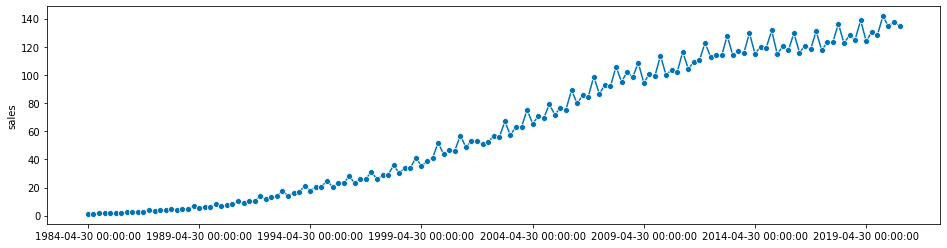

In [250]:
plot_series(y)

### 1.5 Split data (0.75 pt.)
[back to contents](#Contents)

Split the data into train and test samples:

``` temporal_train_test_split(...) ```

choose ``` test_size=0.2 ```

In [251]:
y_train, y_test=temporal_train_test_split(y, test_size=0.2)

plot train and test samples using ``` plot_series ```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

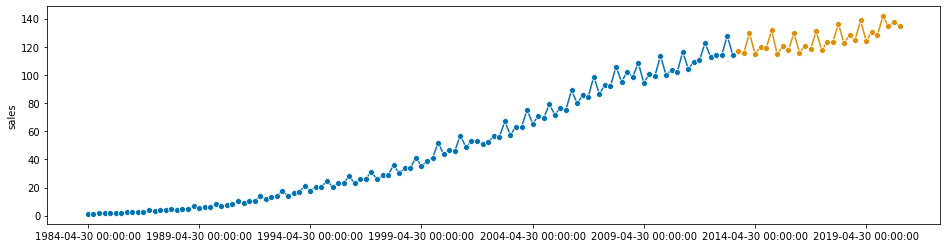

In [252]:
plot_series(y_train, y_test)

## 2. ETS (7 pt.)

### 2.1 Estimate ETS (MAA) and (AAM) (1 pt.)
[back to contents](#Contents)

Start with ETS (MAA). Estimate the model and name it ```model_MAA```:

```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_MAA=model_MAA.fit()```


In [253]:
model_MAA = ETSModel(y_train, error='mul', trend='add', seasonal='add', seasonal_periods=4)
fit_MAA = model_MAA.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


Estimate ETS (AAM) with the same characteristics:
    
```ETSModel(..., error='...', trend='...', seasonal='...', seasonal_periods=...)```

```fit_AAM=model_AAM.fit()```


In [254]:
model_AAM = ETSModel(y_train, error='add', trend='add', seasonal='mul', seasonal_periods=4)
fit_AAM = model_AAM.fit()

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-OCT will be used.
  warnings.warn('No frequency information was'


### 2.2 Point forecasts (1 pt.)
[back to contents](#Contents)

Obtain point forecasts for ETS(MAA) with forecasting horizon=30 quarters:

```fit_MAA.forecast(steps=...)```

In [255]:
model_MAA_forecast = fit_MAA.forecast(steps=30)
model_MAA_forecast

2013-07-31    117.848870
2013-10-31    117.364671
2014-01-31    130.725437
2014-04-30    117.901781
2014-07-31    121.230478
2014-10-31    120.746279
2015-01-31    134.107045
2015-04-30    121.283389
2015-07-31    124.612086
2015-10-31    124.127887
2016-01-31    137.488653
2016-04-30    124.664997
2016-07-31    127.993694
2016-10-31    127.509496
2017-01-31    140.870262
2017-04-30    128.046605
2017-07-31    131.375302
2017-10-31    130.891104
2018-01-31    144.251870
2018-04-30    131.428213
2018-07-31    134.756911
2018-10-31    134.272712
2019-01-31    147.633478
2019-04-30    134.809822
2019-07-31    138.138519
2019-10-31    137.654320
2020-01-31    151.015086
2020-04-30    138.191430
2020-07-31    141.520127
2020-10-31    141.035928
Freq: Q-OCT, Name: simulation, dtype: float64

Obtain point forecasts for ETS(AAM) with forecasting horizon=30 quarters:

```fit_AAM.forecast(steps=...)```

In [256]:
model_AAM_forecast = fit_AAM.forecast(steps=30)
model_AAM_forecast

2013-07-31    119.244363
2013-10-31    117.867061
2014-01-31    133.457354
2014-04-30    118.815377
2014-07-31    124.107293
2014-10-31    122.625311
2015-01-31    138.791147
2015-04-30    123.517009
2015-07-31    128.970223
2015-10-31    127.383561
2016-01-31    144.124941
2016-04-30    128.218640
2016-07-31    133.833153
2016-10-31    132.141811
2017-01-31    149.458734
2017-04-30    132.920272
2017-07-31    138.696083
2017-10-31    136.900061
2018-01-31    154.792528
2018-04-30    137.621904
2018-07-31    143.559012
2018-10-31    141.658311
2019-01-31    160.126321
2019-04-30    142.323535
2019-07-31    148.421942
2019-10-31    146.416561
2020-01-31    165.460115
2020-04-30    147.025167
2020-07-31    153.284872
2020-10-31    151.174811
Freq: Q-OCT, Name: simulation, dtype: float64

Plot both forecasts (AAM) and (MAA), test and train data

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

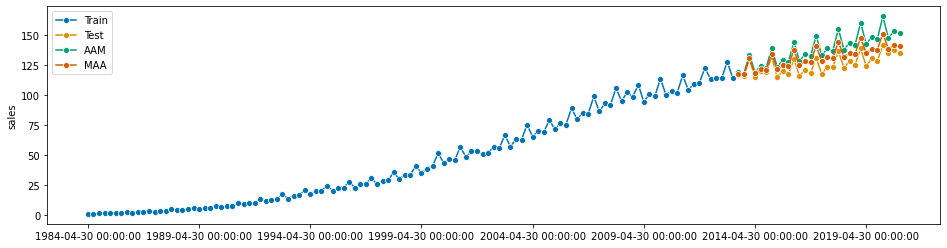

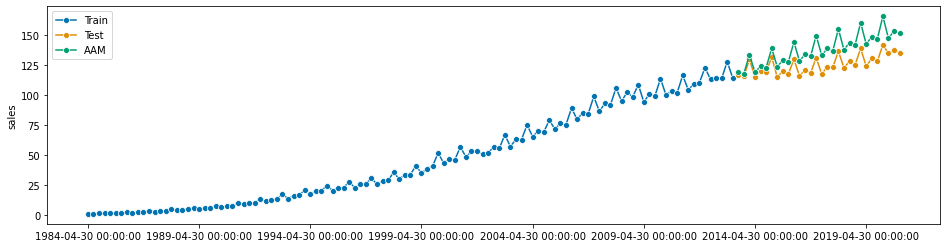

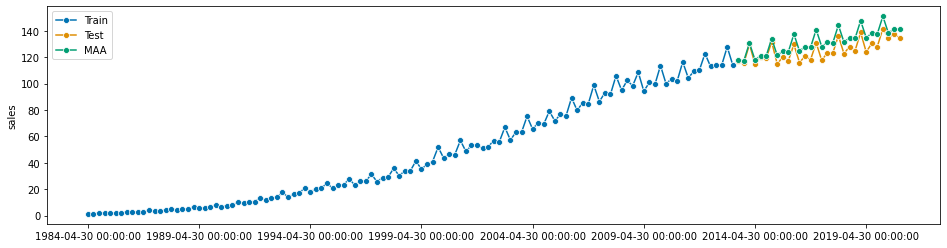

In [257]:
plot_series(y_train, y_test, model_AAM_forecast, model_MAA_forecast, labels=['Train', 'Test', 'AAM', 'MAA'])
plot_series(y_train, y_test, model_AAM_forecast, labels=['Train', 'Test', 'AAM'])
plot_series(y_train, y_test, model_MAA_forecast, labels=['Train', 'Test', 'MAA'])

### 2.3 Interval forecasts ETS(MAA) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

```pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_MAA=pred_MAA.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```


In [258]:
pred_MAA=fit_MAA.get_prediction(start='2013-07-31', end='2020-10-31')
pred_MAA=pred_MAA.summary_frame(alpha=0.05)

upper_int = pred_MAA['pi_upper']
lower_int = pred_MAA['pi_lower']

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

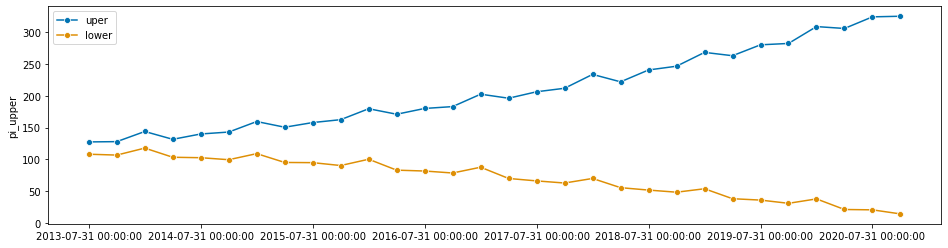

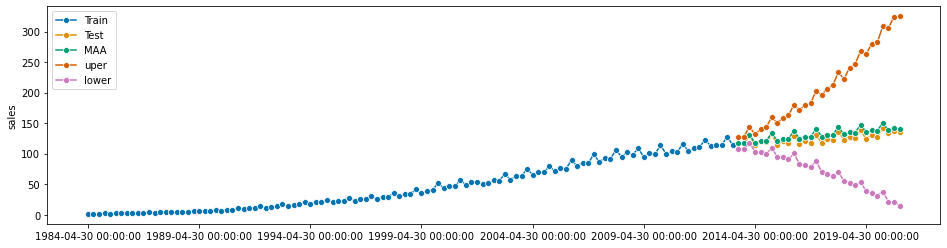

In [259]:
plot_series(upper_int, lower_int, labels=['uper', 'lower'])
plot_series(y_train, y_test, model_MAA_forecast,
            upper_int, 
            lower_int, 
            labels=['Train', 'Test', 'MAA', 'uper', 'lower'])

### 2.4 Interval forecasts ETS(AAM) (1 pt.)
[back to contents](#Contents)

Get 95% confidence intervals:

``` pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31') ```

``` pred_AAM=pred_AAM.summary_frame(alpha=0.05) ```

Expract upper and lower bounds from ```pred_MAA``` and name them ```upper_int``` and ```lower_int```

In [260]:
pred_AAM=fit_AAM.get_prediction(start='2013-07-31', end='2020-10-31')
pred_AAM=pred_AAM.summary_frame(alpha=0.05)
upper_int = pred_AAM['pi_upper']
lower_int = pred_AAM['pi_lower']

Plot interval predictions:

```plot_series()```

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='sales'>)

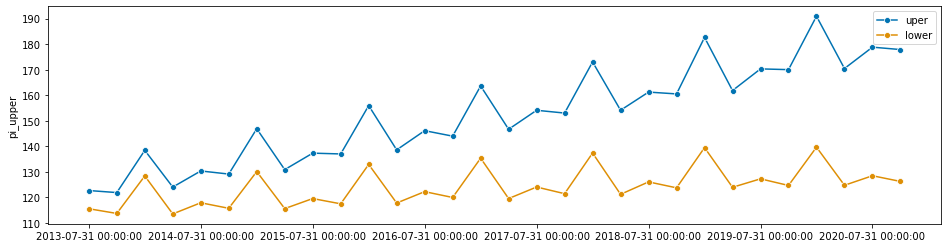

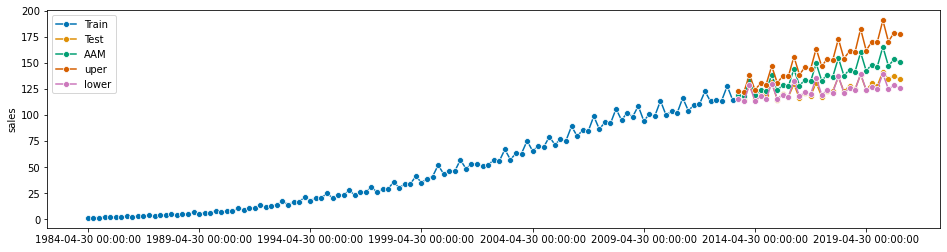

In [261]:
plot_series(upper_int, lower_int, labels=['uper', 'lower'])
plot_series(y_train, y_test, model_AAM_forecast,
            upper_int, 
            lower_int, 
            labels=['Train', 'Test', 'AAM', 'uper', 'lower'])

### 2.5 Forecast quality metrics (2 pt.)
[back to contents](#Contents)

Calculate the following metrics for both ETS(MAA) and ETS(AAM) predictions:

$MAE = \frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{n}$

```python
sklearn.metrics.mean_absolute_error
```

In [262]:
print(mean_absolute_error(y_test, model_MAA_forecast))

6.394548427903006


In [263]:
print(mean_absolute_error(y_test, model_AAM_forecast))

12.709249022192546


$MSE = \frac{\sum\limits_{i=1}^n (y_i-\hat{y}_i)^2}{n}$

```python
sklearn.metrics.mean_squared_error
```

In [264]:
print(mean_squared_error(y_test, model_MAA_forecast))

50.57149764964284


In [265]:
print(mean_squared_error(y_test, model_AAM_forecast))

195.9731889195371


$MAPE = \frac{100}{n}\frac{\sum\limits_{i=1}^n |y_i-\hat{y}_i|}{y_i}$ 

```python
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
```

Create a new function to calculate MAPE

In [266]:
def mean_absolute_precentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

Calculate MAPE:

In [267]:
print(mean_absolute_precentage_error(y_test, model_MAA_forecast))

5.09170244700045


In [268]:
print(mean_absolute_precentage_error(y_test, model_AAM_forecast))

9.99359132602418


### 2.6 What is the best model according to the metrics above? (1 pt.)

In [269]:
print('All errors are the lowest in MAA. That is whi EST(MAA) it the best')

All errors are the lowest in MAA. That is whi EST(MAA) it the best
